# FGSM Attack and Binary Input Detector Using CIFAR10

### **Fast Gradient Sign Method (FGSM) Attack - Overview**

The Fast Gradient Sign Method (FGSM) is one of the simplest and most widely used techniques for generating adversarial examples. It was introduced by Ian Goodfellow et al. in 2014 as a method to quickly generate adversarial examples to evaluate the vulnerability of machine learning models, particularly neural networks.

The core idea of FGSM is to perturb the original input data by a small amount in the direction that maximizes the model's loss, using the gradient of the loss function with respect to the input. This causes the model to misclassify the perturbed input while keeping the perturbation small enough to not be easily detected.


#### **Key Concepts:**

* **Adversarial Example:** A carefully crafted input that is designed to make a model misclassify it.
* **Loss Function:** The function that measures how well the model's predictions align with the true labels. In the context of classification, the loss is typically the cross-entropy loss.
* **Gradient:** The gradient of the loss with respect to the input indicates how the loss changes as the input is perturbed. By moving the input in the direction of this gradient, we can increase the loss and cause the model to make a wrong prediction.

#### **Steps in the FGSM Attack**

**1. Initialization:**
* Start with an original input xx and the true label yy.
* Calculate the loss $J(x,y)$ (often cross-entropy loss) of the model on the original input.

**2. Compute the Gradient:**
* Compute the gradient of the loss $J(x,y)$ with respect to the input $x$:
$$∇_{x}J(x,y)$$

This gives us the direction in which the input needs to be perturbed to increase the loss, i.e., in the direction that the model is most sensitive to.

**3. Perturbation Calculation:**
    * The perturbation is applied by moving the input in the direction of the gradient. However, to simplify, we only use the **sign** of the gradient instead of the full gradient to create a smaller, more targeted perturbation:
    $$Perturbation=ϵ⋅sign(∇_{x}J(x,y))$$

**Where:**
- $ϵ$ is a small scalar that controls the magnitude of the perturbation.
- $sign(∇_{x}J(x,y))$ means we only take the sign of each component of the gradient, not the magnitude.

**4. Adversarial Example:**
* The final adversarial example is created by adding the perturbation to the original input:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$

Here, $x_{adv}$​ is the adversarial example, which is a slightly modified version of the original input that should be classified incorrectly by the model.

**5. Projection (if necessary):**
* In some cases, especially when working with image data, we may want to ensure the perturbed image stays within the valid range (e.g., pixel values between 0 and 255 for images). However, this projection is often implicit in the FGSM approach, as it doesn't strictly require a projection step like iterative attacks (e.g., PGD).

#### **Formula Breakdown**

The **FGSM attack** formula is:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$

- $x$: The original input (for example, an image).
- $ϵ$: A small scalar value that determines the magnitude of the perturbation. It controls the strength of the adversarial attack. A larger ϵϵ will create a more significant perturbation, while a smaller ϵϵ will result in a more subtle perturbation.
- $∇_{x}J(x,y)$: The gradient of the loss function $J(x,y)$ with respect to the input $x$. This gradient indicates how the model's prediction changes as the input changes.
- $sign(∇_{x}J(x,y))$: The element-wise sign of the gradient, which means each component of the gradient is replaced by either +1, -1, or 0, depending on whether the corresponding component of the gradient is positive, negative, or zero. This makes the perturbation a small, focused change in the input.

#### **How FGSM Works During the Attack**

**1. Start with the original input:**

We begin with an input image $x$ and its true label $y$.

**2. Compute the loss and gradient:**
* Calculate the model’s loss $J(x,y)$, which measures how far the model's prediction is from the true label $y$.
* Compute the gradient $∇_{x}J(x,y)$, which gives us the direction in which the model is most sensitive to the input. The gradient essentially tells us how the model's loss changes with small changes to the input.

**3. Create the perturbation:**
* We take the sign of the gradient $sign(∇_{x}J(x,y))$ to create a binary signal (positive or negative), and multiply it by the perturbation size $ϵ$. This ensures that we only make small, targeted changes to the input.

**4. Generate the adversarial example:**
* The adversarial example is generated by adding the perturbation to the original input:
$$x_{adv}=x+ϵ⋅sign(∇_{x}J(x,y))$$
* The resulting adversarial example xadvxadv​ is very similar to the original input but modified in a way that causes the model to make an incorrect prediction.

**5. Classify the adversarial example:**
* The adversarial example $x_{adv}$ is then passed to the model for classification. Due to the targeted perturbation, the model is likely to misclassify this example, even though the perturbation is small enough to be imperceptible to the human eye (especially in the case of images).

#### **Why FGSM is Fast**

FGSM is considered a "fast" attack because it only requires a single gradient computation and a straightforward update step. The method is efficient and can generate adversarial examples quickly, making it ideal for evaluating the robustness of models. It contrasts with iterative methods (like PGD), which require multiple gradient updates and are computationally more expensive.

#### **Strengths and Weaknesses of FGSM**
**Strengths:**

* **Simplicity**: The method is simple to implement and understand. It requires only a single pass through the model to compute the gradient and generate the perturbation.
* **Speed**: Since it only involves a single gradient computation, FGSM can generate adversarial examples much faster than iterative attacks like PGD.
* **Effectiveness**: Despite its simplicity, FGSM is often effective at causing misclassification, especially when the model is vulnerable.

**Weaknesses:**

* **Weak Attack**: Since it only performs one update step and does not iteratively refine the perturbation, FGSM may not be as effective against more robust models. It may not generate adversarial examples that are as strong as those created by iterative methods.
* **Sensitivity to $ϵ$**: The strength of the attack depends on the choice of $ϵ$. Too small a value might not cause misclassification, while too large a value might make the perturbation visible to humans, especially for image data.

## **Implementation**

This notebook shows the Fast Gradient Method attack implmentation using the ART library against deep learning models trained on CIFAR-10 dataset. The notebook covers the following:

* Load the required libariries
* Load the dataset and inspect the data
* Create a deep learning model
* Train and evaluate the deep learning model on CIFAR test data
* Create an ART Keras classifier.
* Implement FGSM attack using ART
* Create adversarial samples using the FGSM attack
* Evaluate the deep leaarning model against the adversaarial samples
* Create a detector model to detect adversarial samples
* Train and evaluate the detector model

### Install and import required libraries

In [ ]:
# Install the Adversarial Robustness Toolbox for creating and evaluating adversarial attacks.
!pip install adversarial-robustness-toolbox

# Install VisualKeras for visualizing model architecture with layer types and connections.
!pip install visualkeras

In [1]:
# Suppress warnings to keep the output clean.
import warnings
warnings.filterwarnings('ignore')

# Import TensorFlow and other necessary libraries.
import tensorflow as tf
# (Optional) Disable eager execution for TensorFlow v1 compatibility.
# tf.compat.v1.disable_eager_execution()

import numpy as np
from matplotlib import pyplot as plt
# import pandas as pd  # Commented out: not used in this script.

# Import essential Keras components for building a CNN model.
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D
from keras.layers import Dropout, Flatten, BatchNormalization
from keras.regularizers import l2

# Import tools from Adversarial Robustness Toolbox (ART).
from art.utils import load_cifar10, preprocess, to_categorical  # For loading and preparing the CIFAR-10 dataset.

# Import ART components for model wrapping, attacks, and defenses.
from art.estimators.classification import KerasClassifier          # Wraps a Keras model for ART compatibility.
from art.attacks.evasion import FastGradientMethod                 # Defines an adversarial attack method.
from art.defences.detector.evasion import BinaryInputDetector      # Used for detecting adversarial examples.

2025-08-26 14:04:27.952687: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-08-26 14:04:27.965204: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1756235067.982078  395528 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1756235067.987956  395528 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-08-26 14:04:28.004936: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

### 1. Load the CIFAR10 data set and class descriptions:

In [3]:
# Load the CIFAR-10 dataset using ART's utility function.
# This function returns pre-split training and testing data along with their min/max pixel values.
(x_train, y_train), (x_test, y_test), min_, max_ = load_cifar10()

# Define the class names corresponding to CIFAR-10 labels for reference.
class_name = ['airplane', 'automobile', 'bird', 'cat', 'deer',
              'dog', 'frog', 'horse', 'ship', 'truck']

# Retrieve the minimum and maximum pixel values from the training data
# (should typically be in the range [0, 255] before normalization).
min_val = x_train.min()
max_val = x_train.max()

# Output dataset shapes and value range for verification.
x_train.shape, y_train.shape, x_test.shape, y_test.shape, min_val, max_val


((50000, 32, 32, 3),
 (50000, 10),
 (10000, 32, 32, 3),
 (10000, 10),
 np.float64(0.0),
 np.float64(1.0))

### Inspect the data

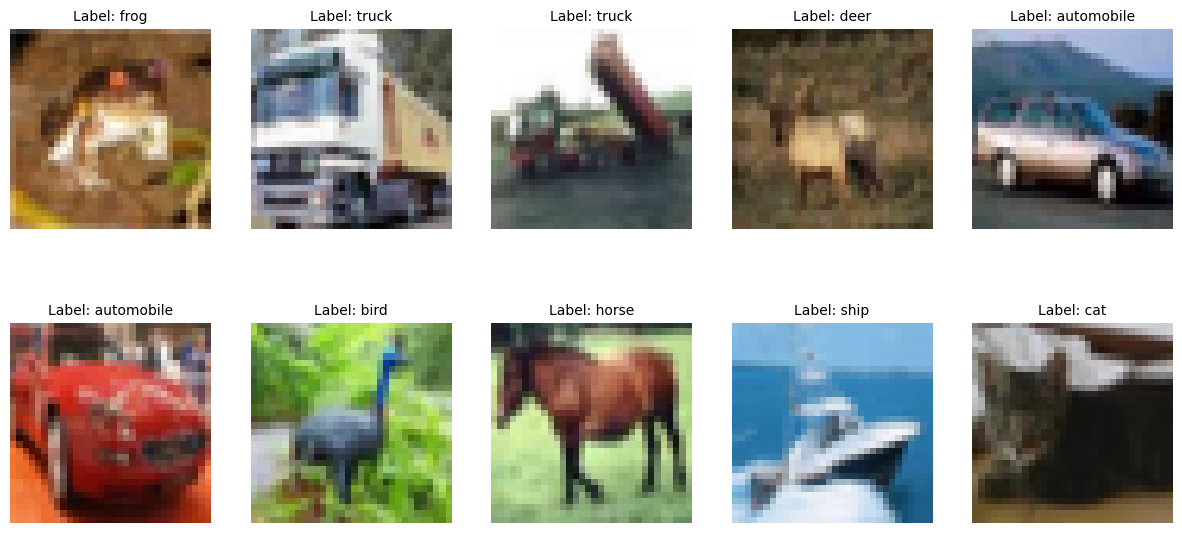

In [4]:
# Plot 10 sample images from the CIFAR-10 training set with their corresponding class labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))  # Create a 2x5 grid of subplots.
ax = ax.flatten()  # Flatten the axes array for easy iteration.

# Display the first 10 training images along with their human-readable class names.
for i, (image, label) in enumerate(zip(x_train[:10], y_train[:10])):
    ax[i].imshow(image)  # Show the image (in RGB).

    # Decode the one-hot encoded label back to its class index, then get the class name.
    ax[i].set_title(f"Label: {class_name[label.argmax()]}", fontsize=10)
    ax[i].axis('off')  # Hide axis ticks for cleaner visualization.

## **Training the Model**

### **Model Description (CIFAR-10 CNN)**

This convolutional neural network (CNN) is designed for image classification on the CIFAR-10 dataset. The architecture includes multiple convolutional blocks, each followed by regularization techniques such as dropout and batch normalization to improve performance and reduce overfitting.

* **Input Layer**: Accepts RGB images of shape (32, 32, 3).

* **Convolutional Blocks**:

  * **Block 1**: Two convolutional layers with 32 filters each, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 2**: Two convolutional layers with 64 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 3**: Two convolutional layers with 128 filters, followed by max pooling, dropout (25%), and batch normalization.
  * **Block 4**: Two convolutional layers with 256 filters, followed by max pooling, dropout (25%), and batch normalization.

* **Fully Connected Layers**:

  * Dense layer with 512 units (ReLU activation) and dropout (50%).
  * Dense layer with 64 units (ReLU activation) and dropout (50%).

* **Output Layer**: Dense layer with 10 units and softmax activation to classify the input image into one of 10 CIFAR-10 classes.

The model is compiled using the **Adam optimizer**, with **categorical cross-entropy** as the loss function and **accuracy** as the evaluation metric.


In [6]:
# Define a deeper Convolutional Neural Network (CNN) for CIFAR-10 image classification.
model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 10 units (one per class) and softmax activation
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Visualize the CNN Architecture

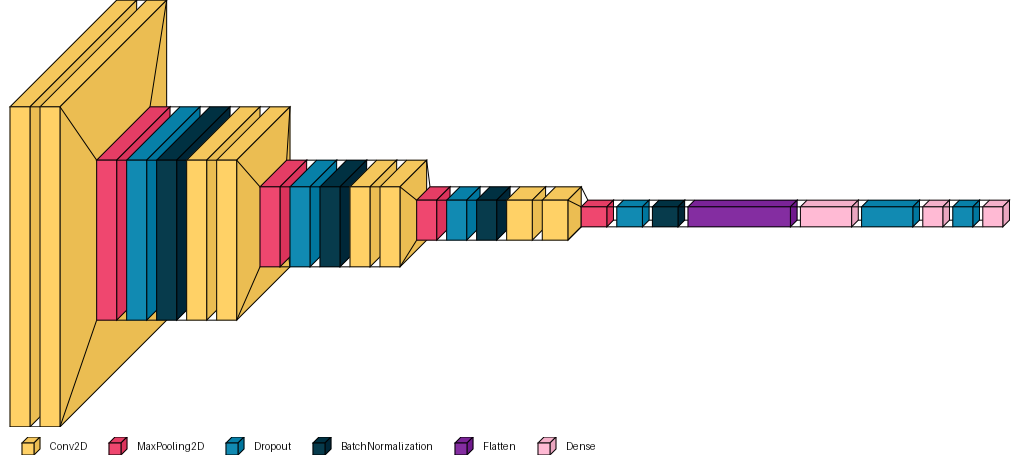

In [ ]:
# import visualkeras
# Display a layered visual representation of the model architecture.
# 'scale_xy' controls the scaling of the diagram.
# 'legend=True' shows layer types with corresponding color codes.
# visualkeras.layered_view(model, scale_xy=10, legend=True)

### Model Summary

In [7]:
# Print a detailed summary of the model architecture,
# including layer types, output shapes, and number of parameters.
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 512)            │             

 Total params: 1,732,458 (6.61 MB)

 Trainable params: 1,731,498 (6.61 MB)

 Non-trainable params: 960 (3.75 KB)

### Visualize Model Architecture Diagram

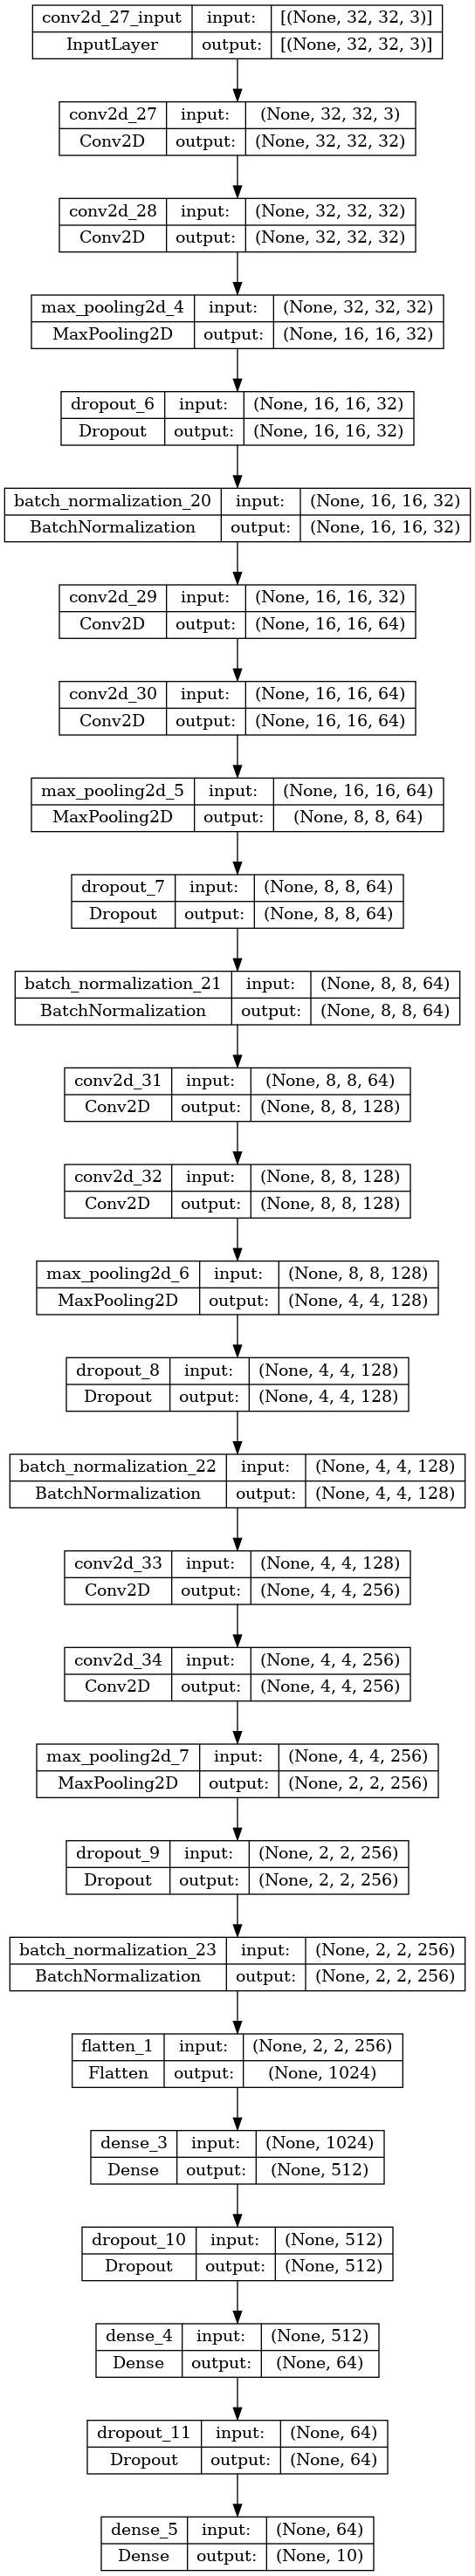

In [ ]:
# Generate and display a plot of the model architecture,
# showing each layer’s name and output shape.
# tf.keras.utils.plot_model(model, show_shapes=True, dpi = 75)

### Train the model

In [8]:
# Train the model on the training data for 250 epochs.
# The history object stores training metrics and loss values.
# history = model.fit(x_train, y_train, batch_size=128, epochs = 250)

### Save/load the model

In [ ]:
# Define the path where the trained model will be saved
model_path = './cifar10_cnn_model.keras'

# If you have trained your own model and want to save it, uncomment and run:
# model.save(model_path)


# Otherwise, load the pretrained model provided (e.g., from GitHub or another source).
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/Models/cifar10_cnn_model.keras -O cifar10_cnn_model.keras
# model = tf.keras.models.load_model('cifar10_cnn_model.keras')

# Display the model architecture summary to make sure the model has successfully been loaded.
# model.summary()

### Evaluate model accuracy on test data.

In [11]:
# Evaluate the model on the test dataset and get loss and accuracy.
loss_test, accuracy_test = model.evaluate(x_test, y_test)

# Print the test accuracy as a percentage.
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

I0000 00:00:1756235186.930653  395974 service.cc:148] XLA service 0x7369f4014350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1756235186.930739  395974 service.cc:156]   StreamExecutor device (0): Quadro RTX 6000, Compute Capability 7.5
2025-08-26 14:06:26.952588: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1756235187.016475  395974 cuda_dnn.cc:529] Loaded cuDNN version 91200
2025-08-26 14:06:27.223390: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"act

 69/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8733 - loss: 0.7855

I0000 00:00:1756235187.902539  395974 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


290/313 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.8415

2025-08-26 14:06:28.654201: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:06:28.671250: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[16,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[16,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8646 - loss: 0.8665
Accuracy on test data: 86.46%


### Wrap the Keras Model with an ART Classifier

In [12]:
# Create an ART KerasClassifier to enable adversarial robustness tools.
# 'clip_values' defines the input data range for normalization and attack generation.
classifier = KerasClassifier(model=model, clip_values=(min_val, max_val))

## Fast Gradient Method (FGM)

### Overview

> class art.attacks.evasion.FastGradientMethod(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, minimal: bool = False, summary_writer: str | bool | SummaryWriter = False)

This attack was originally implemented by Goodfellow et al. (2015) with the infinity norm (and is known as the “Fast Gradient Sign Method”). This implementation extends the attack to other norms, and is therefore called the Fast Gradient Method.
* Paper link: https://arxiv.org/abs/1412.6572

*\_\_init__(estimator: CLASSIFIER_LOSS_GRADIENTS_TYPE, norm: int | float | str = inf, eps: int | float | ndarray = 0.3, eps_step: int | float | ndarray = 0.1, targeted: bool = False, num_random_init: int = 0, batch_size: int = 32, minimal: bool = False, summary_writer: str | bool | SummaryWriter = False) → None*

**Create a FastGradientMethod instance.**

     Parameters:
* estimator – A trained classifier.
* norm – The norm of the adversarial perturbation. Possible values: “inf”, np.inf, 1 or 2.
* eps – Attack step size (input variation).
* eps_step – Step size of input variation for minimal perturbation computation.
* targeted (bool) – Indicates whether the attack is targeted (True) or untargeted (False)
* num_random_init (int) – Number of random initialisations within the epsilon ball. For random_init=0 starting at the original input.
* batch_size (int) – Size of the batch on which adversarial samples are generated.
* minimal (bool) – Indicates if computing the minimal perturbation (True). If True, also define eps_step for the step size and eps for the maximum perturbation.
* summary_writer – Activate summary writer for TensorBoard. Default is False and deactivated summary writer. If True save runs/CURRENT_DATETIME_HOSTNAME in current directory. If of type str save in path. If of type SummaryWriter apply provided custom summary writer. Use hierarchical folder structure to compare between runs easily. e.g. pass in ‘runs/exp1’, ‘runs/exp2’, etc. for each new experiment to compare across them.

    
**generate(x: ndarray, y: ndarray | None = None, \*\*kwargs) → ndarray**

Generate adversarial samples and return them in an array.

    Return type:
* ndarray
    
    
    Parameters:
* x (ndarray) – An array with the original inputs.
* y – Target values (class labels) one-hot-encoded of shape (nb_samples, nb_classes) or indices of shape (nb_samples,). Only provide this parameter if you’d like to use true labels when crafting adversarial samples. Otherwise, model predictions are used as labels to avoid the “label leaking” effect (explained in this paper: https://arxiv.org/abs/1611.01236). Default is None.

* mask (np.ndarray) – An array with a mask broadcastable to input x defining where to apply adversarial perturbations. Shape needs to be broadcastable to the shape of x and can also be of the same shape as x. Any features for which the mask is zero will not be adversarially perturbed.

        Returns:
* An array holding the adversarial examples.

Link: https://adversarial-robustness-toolbox.readthedocs.io/en/latest/modules/attacks/evasion.html#fast-gradient-method-fgm


### Create an ART Fast Gradient Sign Method attack.

In [21]:
# eps – defines the attack step size (input variation). The smaller the eps, the little the attack scale would be.
attack_fgsm = FastGradientMethod(estimator=classifier, eps=0.1)

### Generate adversarial test data.

In [ ]:
# Reduce test set size to 500 samples for faster adversarial generation and evaluation.
x_test = x_test[:500]
y_test = y_test[:500]

# Generate adversarial examples from the reduced test set using the FGSM attack.
x_test_adv = attack_fgsm.generate(x_test)

### Save or Load FGSM-Generated Adversarial Test Data

In [23]:
# Option 1: Save your newly generated adversarial test data (uncomment to use).
fgsm_data_path = 'fgsm_poison_data_cifar10_test_S500.npz'
np.savez(fgsm_data_path,
         x_test_adv=x_test_adv, y_test_adv=y_test)

# Option 2: Load previously saved adversarial test data (recommended for reuse or quick experiments).
# Download the data file from GitHub raw URL
# !wget https://raw.githubusercontent.com/mnazari123/SecAI_Workshop_Data/main/data/fgsm_poison_data_cifar10_test_S500.npz

# x_test_data = np.load(fgsm_data_path)
# x_test_adv, y_test = x_test_data['x_test_adv'], x_test_data['y_test_adv']
# x_test_adv.shape, y_test.shape

### Visualise the first adversarial test sample.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


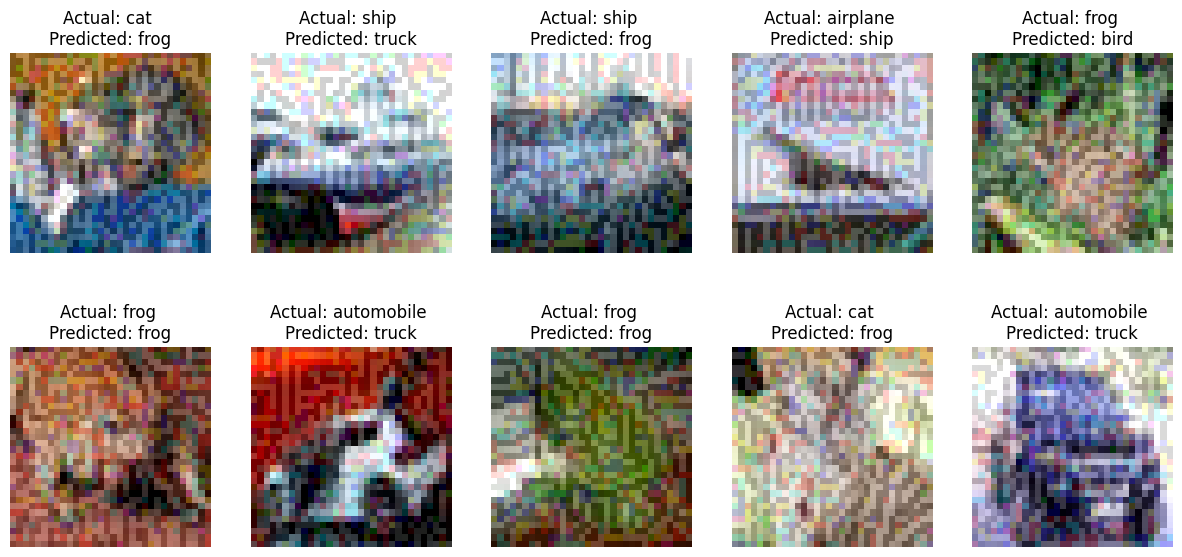

In [24]:
# Display the first 10 adversarial examples along with their actual and predicted labels.
fig, ax = plt.subplots(2, 5, figsize=(15, 7))
ax = ax.flatten()

for i, (image, label) in enumerate(zip(x_test_adv[:10], y_test[:10])):
    # Display the adversarial image.
    ax[i].imshow(image)

    # Show actual and predicted labels.
    prediction = model.predict(np.expand_dims(image, axis=0)).argmax()
    ax[i].set_title(f"Actual: {class_name[label.argmax()]} \nPredicted: {class_name[prediction]}", fontsize=12)
    ax[i].axis('off')

### Evaluate the Model on Adversarial Test Data

In [25]:
# Evaluate model performance on adversarial examples.
loss_test, accuracy_test = model.evaluate(x_test_adv, y_test)

# Calculate the average perturbation introduced by the adversarial attack.
perturbation = np.mean(np.abs(x_test_adv - x_test))

# Print evaluation results.
print('Accuracy on adversarial test data: {:4.2f}%'.format(accuracy_test * 100))
print('Average perturbation: {:4.2f}'.format(perturbation))

 1/16 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.1875 - loss: 10.0643

2025-08-26 14:07:57.295458: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:07:57.316255: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[20,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[20,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.2260 - loss: 9.2897
Accuracy on adversarial test data: 22.60%
Average perturbation: 0.09


## Prepare Training Data for Adversarial Sample Detector

In [ ]:
# Generate new adversarial examples from a subset of the training data using FGSM.
x_train_adv = attack_fgsm.generate(x_train[:500])
nb_train = x_train[:500].shape[0]

# Combine clean and adversarial samples to create a binary classification dataset for detection.
x_train_detector = np.concatenate((x_train[:500], x_train_adv), axis=0)

# Create labels: [1, 0] for clean samples, [0, 1] for adversarial samples.
y_train_detector = np.concatenate((
    np.array([[1, 0]] * nb_train),  # Clean
    np.array([[0, 1]] * nb_train)   # Adversarial
), axis=0)

### Save or Load Adversarial Detector Training Data

In [ ]:
# Option 1: Save generated clean and adversarial samples for training the detector.
np.savez('./fgsm_poison_data_cifar10_train_S1000.npz',
         x_train_detector=x_train_detector, y_train_detector=y_train_detector)

# Option 2: Load pre-saved detector training data to avoid regeneration.
# detector_data = np.load('./fgsm_generated_data/fgsm_detector_generated_cifar10.npz')
# x_train_detector, y_train_detector = detector_data['x_train_detector'], detector_data['y_train_detector']

# Verify the shape of loaded or prepared data.
# x_train_detector.shape, y_train_detector.shape

## Build a similar CNN architecture model for detecting Adversarial Inputs

In [28]:
detector_model = tf.keras.models.Sequential([
    # First convolutional block: two Conv2D layers followed by pooling, dropout, and batch normalization
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=(32, 32, 3)),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Second convolutional block
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Third convolutional block
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Fourth convolutional block
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.Conv2D(256, (3, 3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.BatchNormalization(),

    # Flatten feature maps to feed into dense layers
    tf.keras.layers.Flatten(),

    # Fully connected layers with dropout for regularization
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),

    # Output layer with 2 units (one per class) and softmax activation
    tf.keras.layers.Dense(2, activation='softmax') # Two output classes: [clean, adversarial]
])

# Compile the model with Adam optimizer, categorical crossentropy loss, and accuracy metric
detector_model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

### Train the Adversarial Detector Model

In [29]:
# Train the adversarial detector model for 10 epochs.
# Since the goal is to distinguish between clean and adversarial inputs,
# a few epochs (e.g., 10) are typically sufficient to learn this binary classification task.
history = detector_model.fit(x_train_detector, y_train_detector, epochs=10)

Epoch 1/10


2025-08-26 14:08:28.002212: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:08:28.024576: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[32,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[32,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationF

21/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5390 - loss: 1.0577

2025-08-26 14:08:33.339857: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kNone","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:08:33.365564: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 162ms/step - accuracy: 0.6540 - loss: 0.7307
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9180 - loss: 0.2607
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9190 - loss: 0.2392
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9440 - loss: 0.2022
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9350 - loss: 0.1966
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9510 - loss: 0.1818
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9430 - loss: 0.1944
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9300 - loss: 0.2194
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9530 - loss: 0.1818
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9520 - loss: 0.1869


In [30]:
# Define path to save/load the detector model
detector_model_path = './fgsm_detector_model_cifar10.keras'
# detector_model.save(detector_model_path)

# Load the pre-trained detector model from the specified path
# detector_model = tf.keras.models.load_model(path)

# Display the model architecture to make sure the models has been loaded successfully.
detector_model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_16 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 16, 16, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 8, 8, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 4, 4, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_22 (Conv2D)              │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_23 (Conv2D)              │ (None, 4, 4, 256)      │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 2, 2, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 512)            │       524,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_16 (Dropout)            │ (None, 512)            │             

 Total params: 5,193,896 (19.81 MB)

 Trainable params: 1,730,978 (6.60 MB)

 Non-trainable params: 960 (3.75 KB)

 Optimizer params: 3,461,958 (13.21 MB)

## Prepare test samples for the detector model

In [31]:
# Get the number of original test samples
nb_test = x_test.shape[0]

# Combine clean and adversarial test images into one array
x_test_detector = np.concatenate((x_test, x_test_adv), axis=0)

# Create corresponding labels: [1, 0] for clean, [0, 1] for adversarial
y_test_detector = np.concatenate((np.array([[1, 0]] * nb_test),
                                  np.array([[0, 1]] * nb_test)), axis=0)

### Evaluat the result

In [32]:
loss_test, accuracy_test = detector_model.evaluate(x_test_detector, y_test_detector)
print('Accuracy on test data: {:4.2f}%'.format(accuracy_test * 100))

22/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9929 - loss: 0.1999   

2025-08-26 14:09:00.731778: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,3,32,32]{3,2,1,0}, f32[32,3,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForward", backend_config={"cudnn_conv_backend_config":{"activation_mode":"kRelu","conv_result_scale":1,"leakyrelu_alpha":0,"side_input_scale":0},"force_earliest_schedule":false,"operation_queue_id":"0","wait_on_operation_queues":[]}
2025-08-26 14:09:00.756811: I external/local_xla/xla/service/gpu/autotuning/conv_algorithm_picker.cc:557] Omitted potentially buggy algorithm eng14{k25=0} for conv (f32[8,32,32,32]{3,2,1,0}, u8[0]{0}) custom-call(f32[8,32,32,32]{3,2,1,0}, f32[32,32,3,3]{3,2,1,0}, f32[32]{0}), window={size=3x3 pad=1_1x1_1}, dim_labels=bf01_oi01->bf01, custom_call_target="__cudnn$convBiasActivationForwa

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.9340 - loss: 0.2367
Accuracy on test data: 93.40%


### Wrap detector model for adversarial detection

In [33]:
# Wrap the Keras detector model with ART's KerasClassifier
detector_classifier = KerasClassifier(clip_values=(0.0, 0.1), model=detector_model, use_logits=False)

# Create a BinaryInputDetector using the wrapped classifier
detector = BinaryInputDetector(detector_classifier)

### Train the BinaryInputDetector

In [34]:
# Train the detector on labeled clean and adversarial training data
detector.fit(x_train_detector, y_train_detector, nb_epochs=10, batch_size=32)

#### Evaluating the detector

In [35]:
# Apply the detector to the adversarial test data
_, is_adversarial = detector.detect(x_test_adv)

# Count how many adversarial samples were flagged
flag_adv = np.sum(is_adversarial)

# Display detection results
print("Adversarial test data (first 500 images):")
print("Flagged: {}".format(flag_adv))
print("Not flagged: {}".format(500 - flag_adv))

Adversarial test data (first 500 images):
Flagged: 461
Not flagged: 39


#### Evaluating the detector on clean (non-adversarial) data

In [38]:
_, is_adversarial = detector.detect(x_test)
flag_original = np.sum(is_adversarial)

print("Original test data (first 500 images):")
print("Flagged: {}".format(flag_original))
print("Not flagged: {}".format(500 - flag_original))

Original test data (first 500 images):
Flagged: 0
Not flagged: 500


#### Evaluate the detector across different attack strengths (eps values)

In [40]:
# Note: Detector was trained with adversarial samples generated using eps = 0.1

eps_range = [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
nb_flag_adv = []      # Number of adversarial examples flagged by the detector
nb_missclass = []     # Number of adversarial examples that fooled the classifier

for eps in eps_range:
    # Update FGSM attack with current epsilon
    attack_fgsm.set_params(**{'eps': eps})

    # Generate adversarial examples for current eps
    x_test_adv = attack_fgsm.generate(x_test[:100])

    # Count how many were flagged by the detector
    nb_flag_adv.append(np.sum(detector.detect(x_test_adv)[1]))

    # Count how many were misclassified by the classifier
    nb_missclass.append(
        np.sum(np.argmax(classifier.predict(x_test_adv), axis=1) != np.argmax(y_test[:100], axis=1))
    )

# Add clean data evaluation (eps=0) to the results
eps_range = [0] + eps_range
nb_flag_adv = [flag_original] + nb_flag_adv  # flag_original from clean data detection
nb_missclass = [2] + nb_missclass            # 2 misclassifications in clean test subset

#### Plot detector performance vs. classifier errors for varying attack strengths

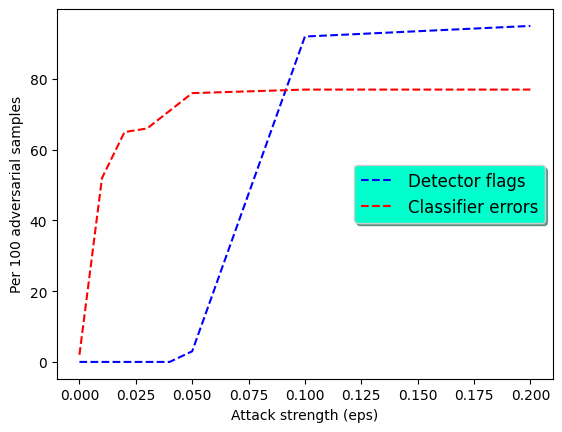

In [41]:
fig, ax = plt.subplots()
ax.plot(np.array(eps_range)[:8], np.array(nb_flag_adv)[:8], 'b--', label='Detector flags')
ax.plot(np.array(eps_range)[:8], np.array(nb_missclass)[:8], 'r--', label='Classifier errors')

legend = ax.legend(loc='center right', shadow=True, fontsize='large')
legend.get_frame().set_facecolor('#00FFCC')

plt.xlabel('Attack strength (eps)')
plt.ylabel('Per 100 adversarial samples')
plt.show()

### Summary:

The Fast Gradient Sign Method (FGSM) is an adversarial attack that perturbs input data to mislead machine learning models. It generates adversarial examples by adding a small, directed perturbation to each input, calculated using the gradient of the loss function with respect to the input. The perturbation is controlled by a parameter $ϵ$, which determines the magnitude of the change. Specifically, the perturbed input is given by $x′=x+ϵ⋅sign(∇xJ(θ,x,y))$. A larger $ϵ$ increases the perturbation, making the attack more likely to succeed but potentially more noticeable.